# Aim: Loan Application Status Prediction.

## Problem Statement: 
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Here our aim is to automate the loan eligibility process on the baisis of the data provided by the customer while filling up the application. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.  

### Dataset Description:

Loan_ID :- Unique Loan ID  
Gender :- 	Male/ Female  
Married :-  	Applicant married (Y/N)  
Dependents :-	Number of dependents  
Education :- 	Applicant Education (Graduate/ Under Graduate)  
Self_Employed :- 	Self employed (Y/N)  
ApplicantIncome	:-  Applicant income  
CoapplicantIncome :- 	Coapplicant income  
LoanAmount :-  	Loan amount in thousands  
Loan_Amount_Term :- 	Term of loan in months  
Credit_History :- 	credit history meets guidelines  
Property_Area :- 	Urban/ Semi Urban/ Rural  
Loan_Status :-	Loan approved (Y/N)  

### Dependent Variable (Target Variable):
Loan_Status :- Loan approved (Y/N)

In [1]:
#importing required libraries
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
lp=pd.read_csv(r'C:\Users\SREEDHAR\Documents\Data science\ML projects\loan_prediction.csv')

In [3]:
lp.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
205,LP001692,Female,No,0,Not Graduate,No,4408,0.0,120.0,360.0,1.0,Semiurban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y


## Data Analysis

In [4]:
lp.shape

(614, 13)

In [5]:
lp.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Dataset have total 614 entries.  
It is having 614 Rows and Total 13 columns.  
We can see 4 colunms are float,  1 is interger and 8 are object type.  
Data having null vaues in gender. married, dependent, Self_Employed, LoanAmount, Loan_Amount_Term and  Credit_History columns.  
loan ID is unique ID it is Object type, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status are categorical values  
Here we can see Dependents cannot be a object, its a numerical data, we will check this in further steps.  
ApplicantIncome, CoapplicantIncome,LoanAmount, Loan_Amount_Term, Credit_History are Continuous data.  

In [7]:
#Dropping Loan ID column, as its not important for our analysis.
lp.drop('Loan_ID', axis=1, inplace= True)

##### Checking Null values 

In [8]:
lp.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here we can see data is having null values.

### Filling Null values

Here we can see our missing values are less than 5 percent, we can use mean, meadian and Mode to fill Nan. 

In [9]:
lp.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
pd.set_option('display.max_rows', None)

Dependents columns having value 3+, which we will convert into 3 only and we will change the data type of the column also.

In [11]:
lp.isin(["3+"]).sum()

Gender                0
Married               0
Dependents           51
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
lp.replace(to_replace="3+", value='3', inplace= True)

In [13]:
cat_features= lp.select_dtypes(include=[np.object])
cat_features.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [14]:
for col in cat_features:
    print('\n%s column: '%col)
    print(lp[col].value_counts())
    print('=='*16)


Gender column: 
Male      489
Female    112
Name: Gender, dtype: int64

Married column: 
Yes    398
No     213
Name: Married, dtype: int64

Dependents column: 
0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

Education column: 
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed column: 
No     500
Yes     82
Name: Self_Employed, dtype: int64

Property_Area column: 
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status column: 
Y    422
N    192
Name: Loan_Status, dtype: int64


Filling Null values in categorical columns using Mode.

In [15]:
lp['Gender'].fillna(value='Male', inplace=True)

In [16]:
lp['Married'].fillna(value='Yes', inplace=True)

In [17]:
lp['Dependents'].fillna(value='0', inplace=True)

In [18]:
lp['Self_Employed'].fillna(value='No', inplace=True)

Lets deal with Numerical data. We will use mean or meadian to replace null values.  
First check skewness for categorical data.

Here we can see data is skewed, we use Median not mean

In [19]:
num_features= lp.select_dtypes(include=[np.number])
num_features.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [20]:
lp['LoanAmount'].fillna(value=lp['LoanAmount'].median(), inplace= True)

In [21]:
lp['Loan_Amount_Term'].fillna(value=lp['Loan_Amount_Term'].median(), inplace= True)

In [22]:
lp['Credit_History'].fillna(value=lp['Credit_History'].median(), inplace= True)

We have removed null values lest check again.

In [23]:
lp.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In data info we have seen Dependents having data type as object, but it is numerical value. Lets change the Dtype to Int64.

In [25]:
lp['Dependents']=lp['Dependents'].astype(str).astype(int)

In [26]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


## Discriptive Statistics

In [27]:
lp.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


## EDA

### Univariate Analysis

Using Univariate analysis we will analyse distribution of data using various graphs.

Lets before analysis Label Encode Target columns.

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lp['Loan_Status']=le.fit_transform(lp['Loan_Status'])

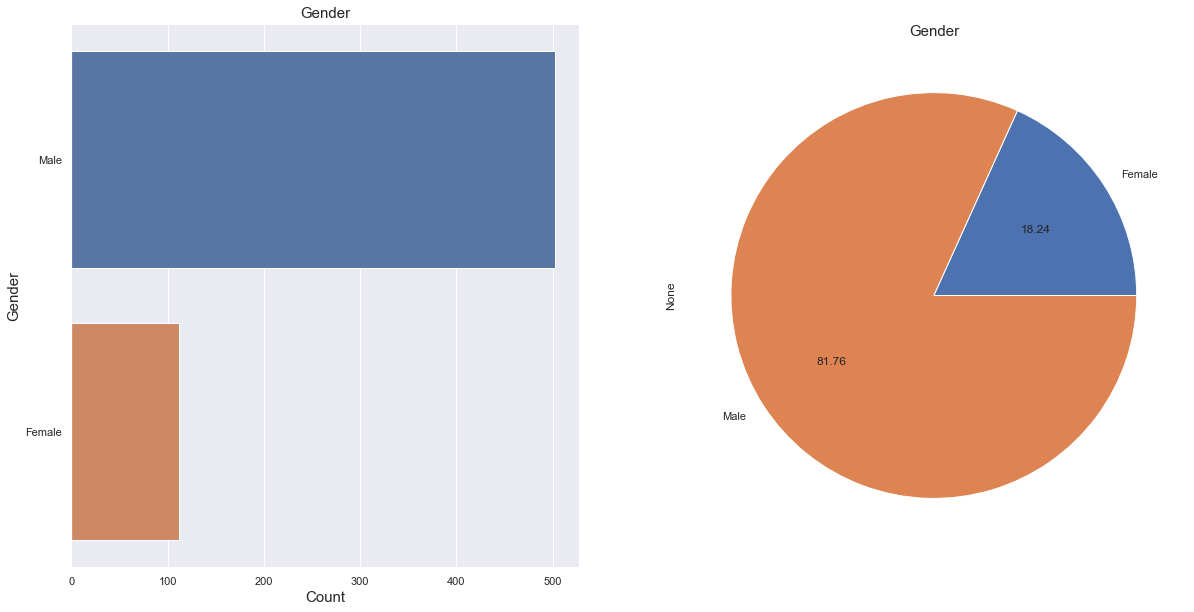

In [30]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(y=lp['Gender'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Gender', fontsize=15 )
plt.title('Gender', fontsize=15)

plt.subplot(1,2,2)
lp.groupby('Gender').size().plot(kind='pie', autopct='%.2f')
plt.title('Gender', fontsize=15)
plt.show()

Here we can see 81.76 percent of Applicants are Male. 

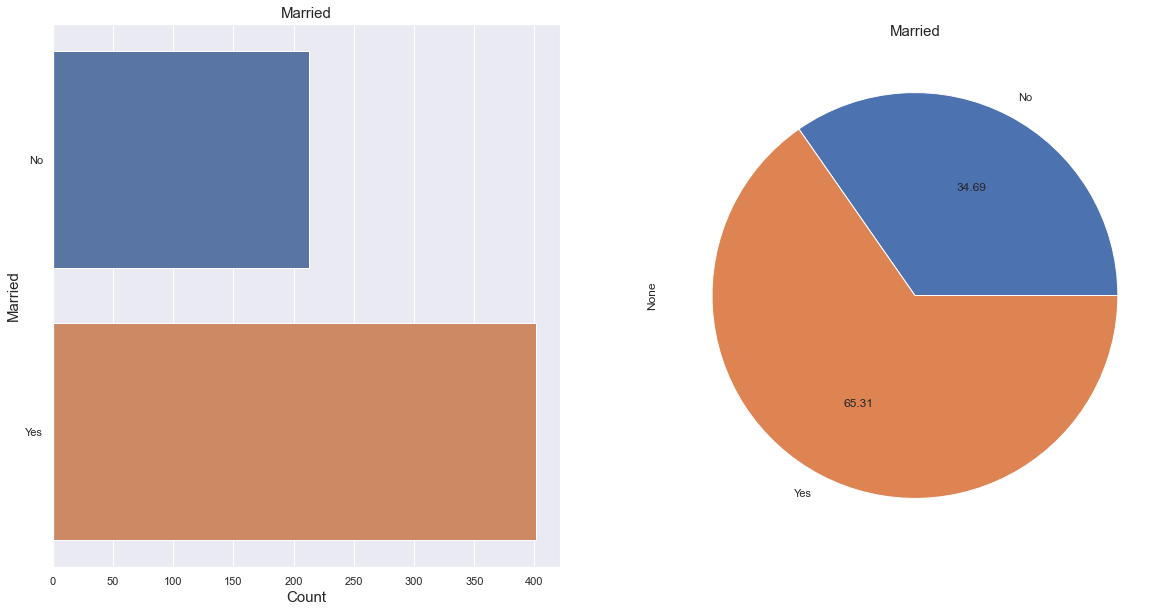

In [31]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(y=lp['Married'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Married', fontsize=15 )
plt.title('Married', fontsize=15)

plt.subplot(1,2,2)
lp.groupby('Married').size().plot(kind='pie', autopct='%.2f')
plt.title('Married', fontsize=15)
plt.show()

We can see 65.31 percent of Applicants are Married.  
Mostly married pepole are applying for loans to fullfil their needs. 

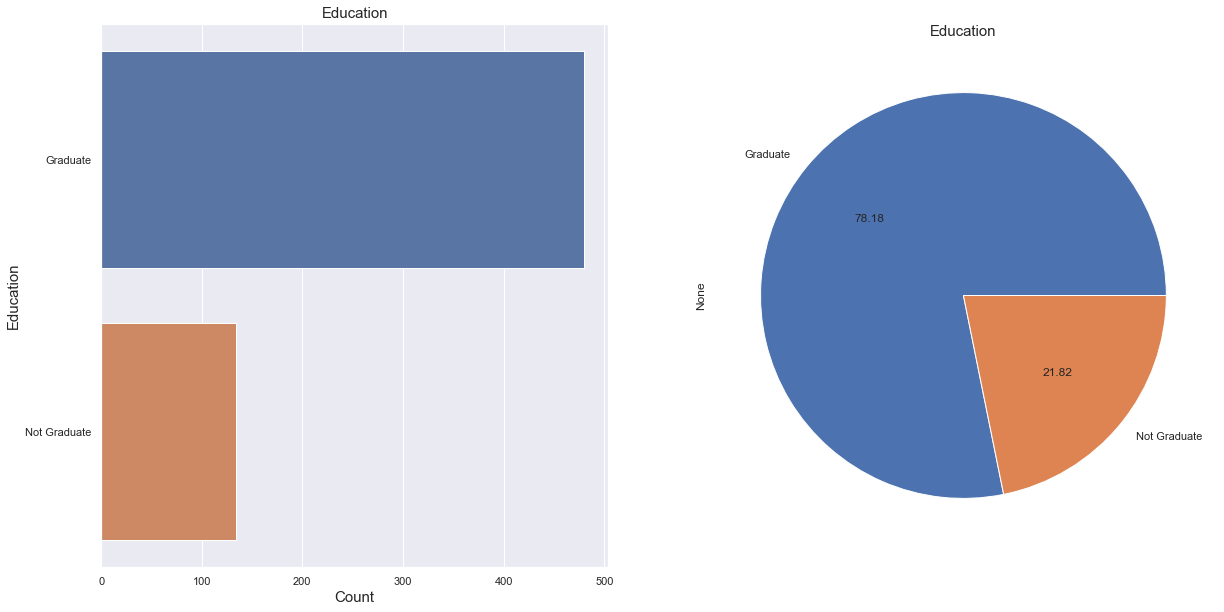

In [32]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(y=lp['Education'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Education', fontsize=15 )
plt.title('Education', fontsize=15)

plt.subplot(1,2,2)
lp.groupby('Education').size().plot(kind='pie', autopct='%.2f')
plt.title('Education', fontsize=15)
plt.show()

Most of the applicatnts are Graduate.  
It indicates the chance of Graduate applicants to get approvel is high.

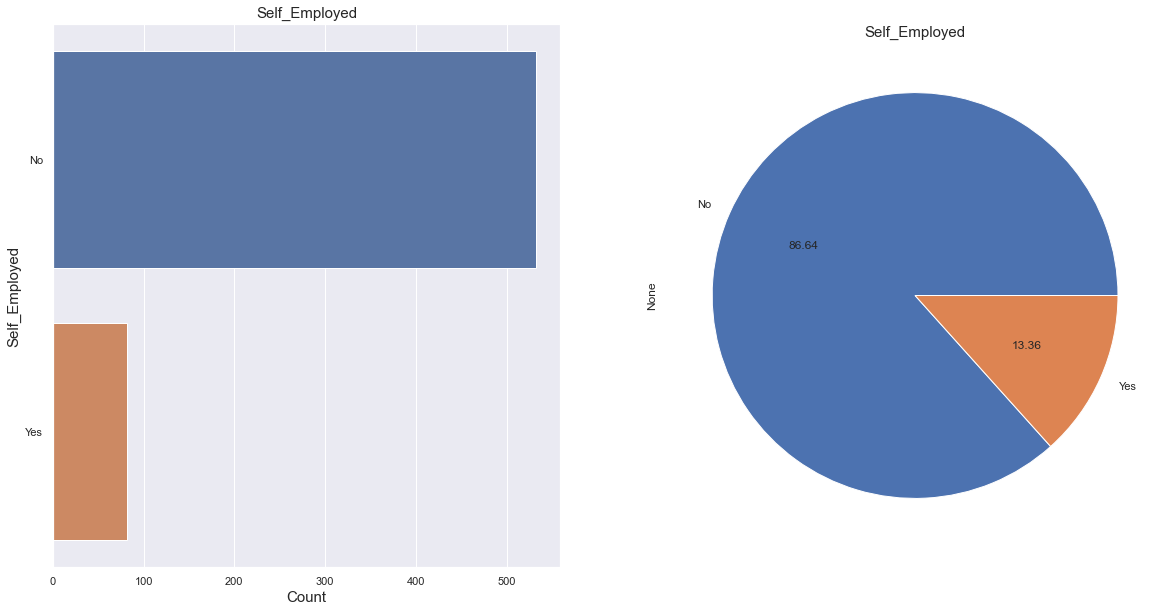

In [33]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(y=lp['Self_Employed'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Self_Employed', fontsize=15 )
plt.title('Self_Employed', fontsize=15)

plt.subplot(1,2,2)
lp.groupby('Self_Employed').size().plot(kind='pie', autopct='%.2f')
plt.title('Self_Employed', fontsize=15)
plt.show()

Pie chart indicates 86.64 percent of the applicants are not self_employed.   
Only 13.36 Applicants are self employed.  
The chance to get load approval is high for applicant who are workign professional or who are in jobs.  

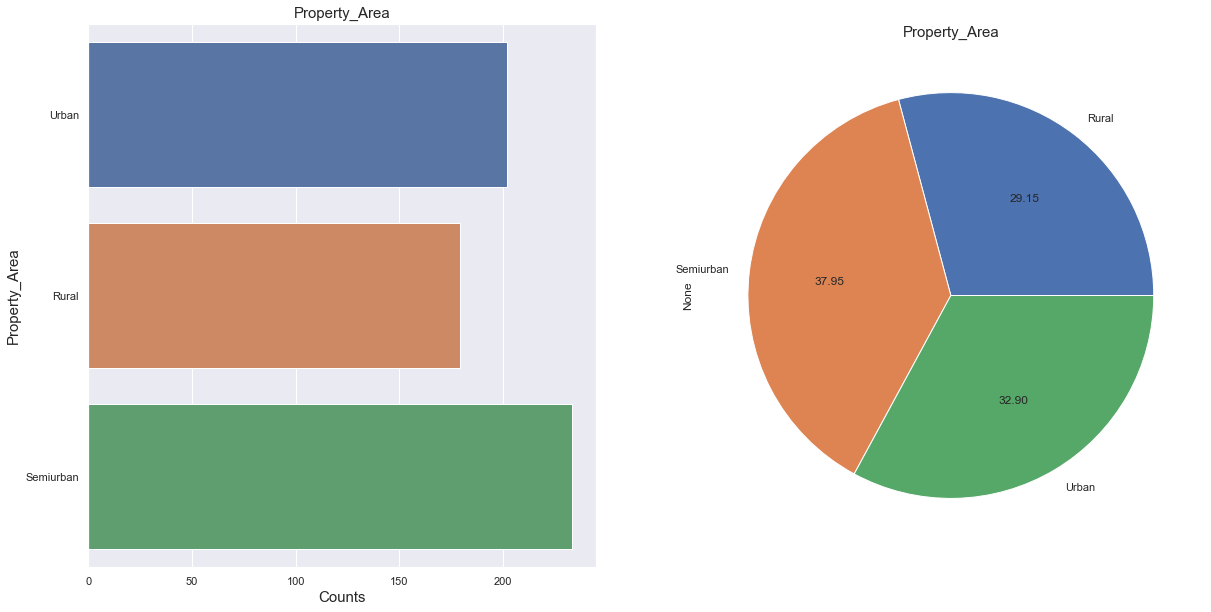

In [34]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(y=lp['Property_Area'] )
plt.xlabel('Counts', fontsize=15 )
plt.ylabel('Property_Area', fontsize=15 )
plt.title('Property_Area', fontsize=15)

plt.subplot(1,2,2)
lp.groupby('Property_Area').size().plot(kind='pie', autopct='%.2f')
plt.title('Property_Area', fontsize=15)
plt.show()

Here we can see Semiurban applicants are more, but the numbers are not very much high,  
Chance of getting loan for each are eaqual. 

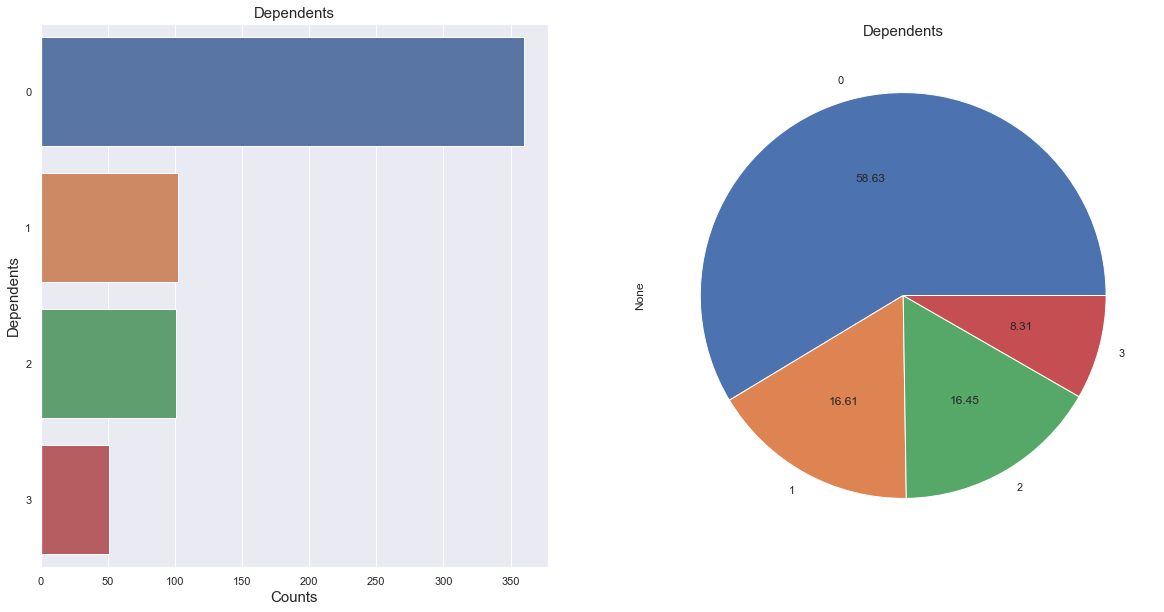

In [35]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(y=lp['Dependents'] )
plt.xlabel('Counts', fontsize=15 )
plt.ylabel('Dependents', fontsize=15 )
plt.title('Dependents', fontsize=15)

plt.subplot(1,2,2)
lp.groupby('Dependents').size().plot(kind='pie', autopct='%.2f')
plt.title('Dependents', fontsize=15)
plt.show()

Here we can see 58.63 percent of Applicants are having 0 dependents. 

Text(0.5, 1.0, 'ApplicantIncome')

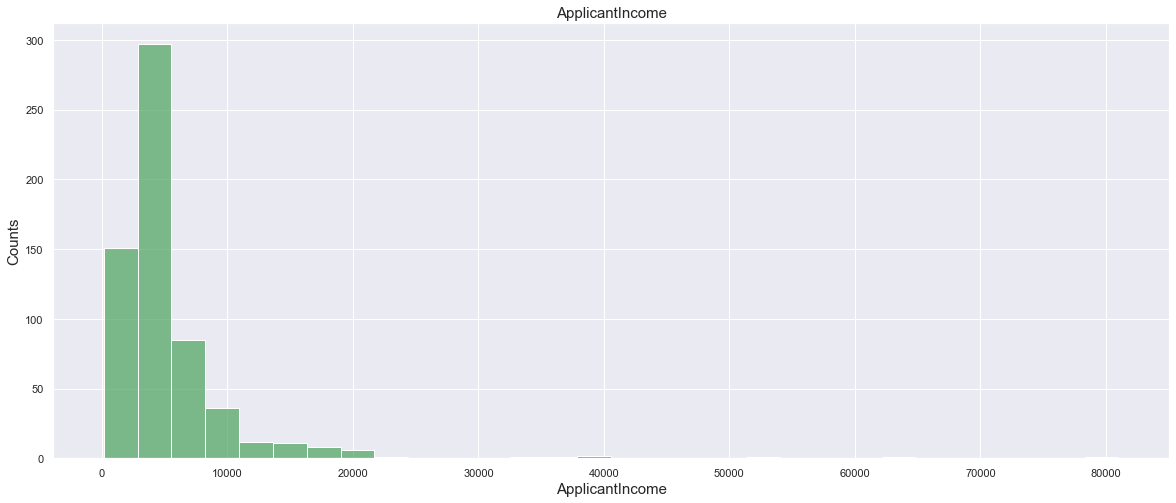

In [36]:
plt.figure(figsize=(20,8))

sns.histplot(num_features['ApplicantIncome'], bins= 30, color='g')
plt.xlabel('ApplicantIncome', fontsize=15 )
plt.ylabel('Counts', fontsize=15 )
plt.title('ApplicantIncome', fontsize=15)

Most of the applicants falls under 10000, very few are having income greater than 10000. 

Text(0.5, 1.0, 'CoapplicantIncome')

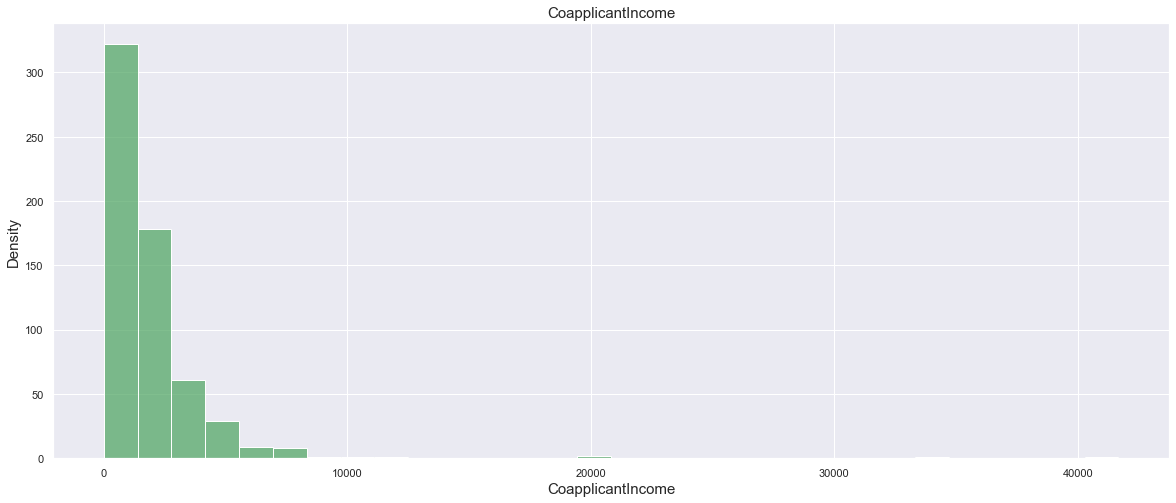

In [37]:
plt.figure(figsize=(20,8))

sns.histplot(num_features['CoapplicantIncome'], bins= 30, color='g')
plt.xlabel('CoapplicantIncome', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('CoapplicantIncome', fontsize=15)

Here we can see coapplicants income is very less as compare to applicants income at the same time numbers also very less. 

Text(0.5, 1.0, 'LoanAmount')

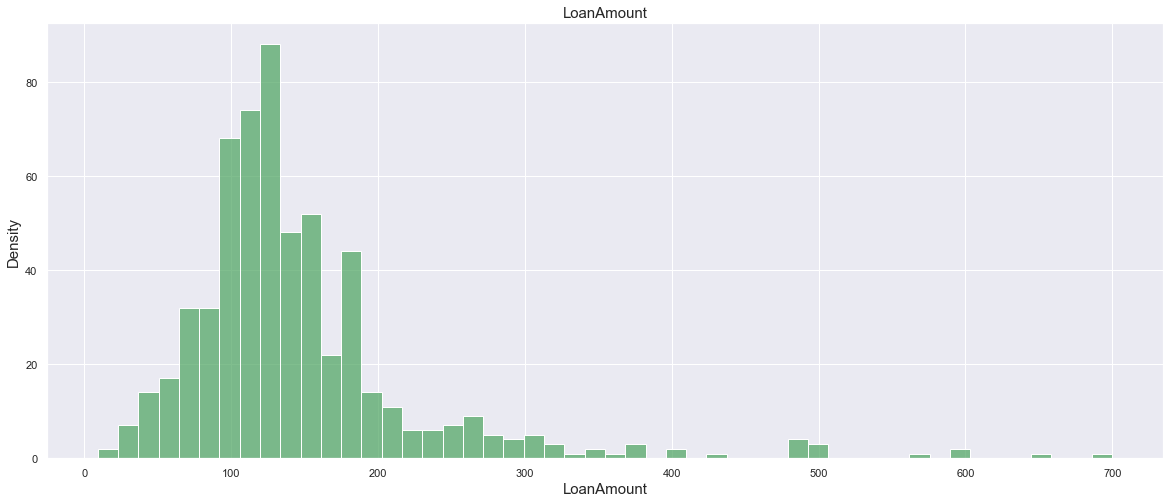

In [38]:
plt.figure(figsize=(20,8))

sns.histplot(num_features['LoanAmount'], bins= 50, color='g')
plt.xlabel('LoanAmount', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('LoanAmount', fontsize=15)

Here we can see most of the applicants apply loan in the range of 100-200, 
Loan number of applicants for loan values greater than 200 are less. 

Text(0.5, 1.0, 'Loan_Amount_Term')

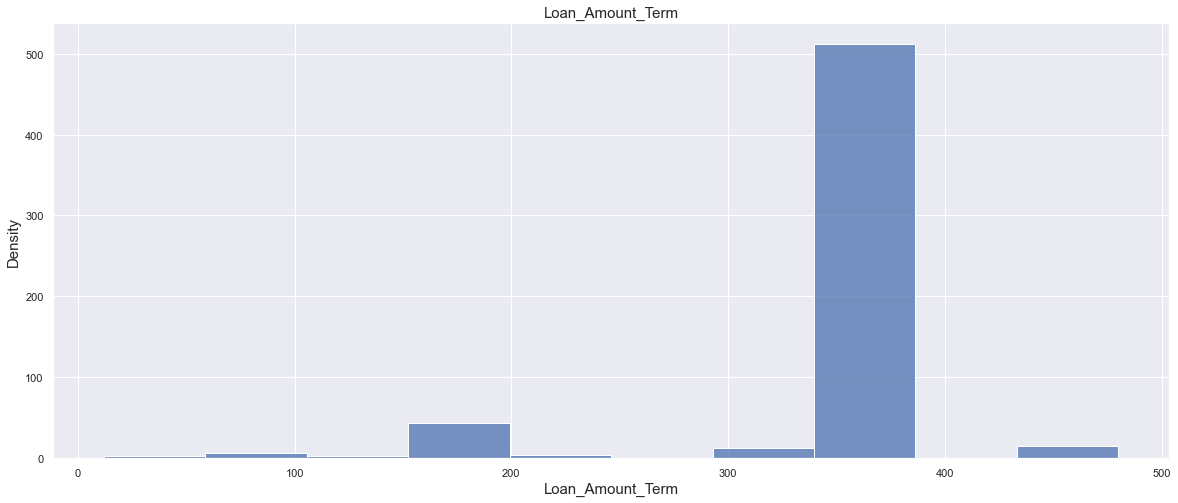

In [39]:
plt.figure(figsize=(20,8))

sns.histplot(num_features['Loan_Amount_Term'], bins= 10)
plt.xlabel('Loan_Amount_Term', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('Loan_Amount_Term', fontsize=15)

Here we can see most of the loan terms are lie bwteen 350-400 range,  
applicat with Loan_Amont_term 350 are high in number.

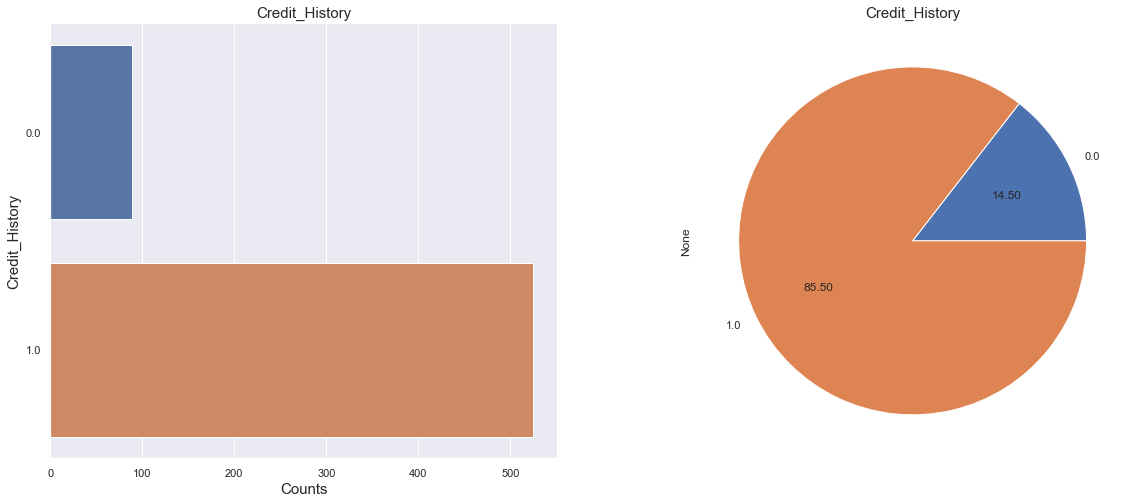

In [40]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(y=lp['Credit_History'] )
plt.xlabel('Counts', fontsize=15 )
plt.ylabel('Credit_History', fontsize=15 )
plt.title('Credit_History', fontsize=15)

plt.subplot(1,2,2)
lp.groupby('Credit_History').size().plot(kind='pie', autopct='%.2f')
plt.title('Credit_History', fontsize=15)
plt.show()

we can see 85.50 percent of Applicants are having Credit_History. 

### Bivariate Analysis

In this secton we will analyse our target variable againt the input values. And check the relationship.  

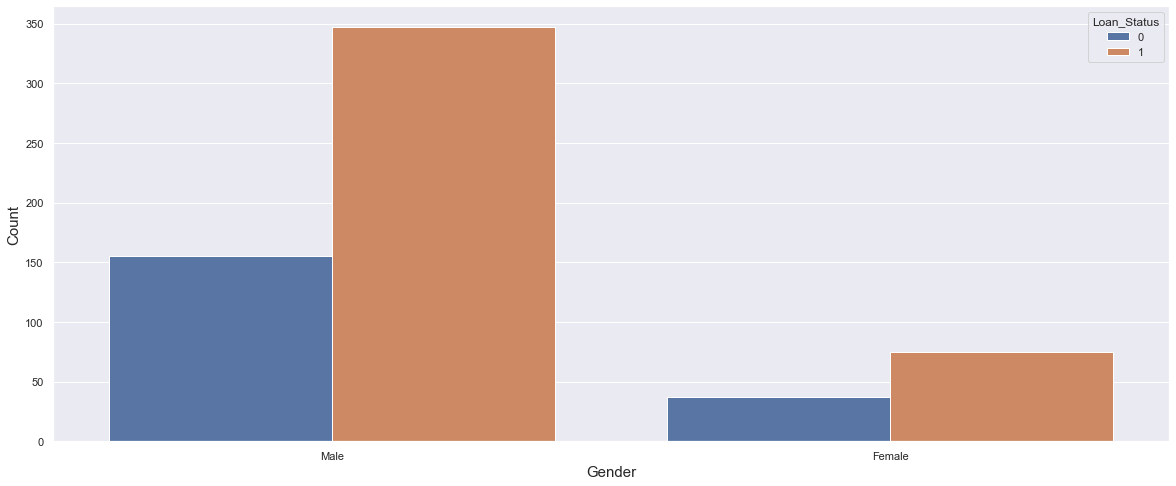

In [41]:
plt.figure(figsize=(20,8))
sns.countplot(lp['Gender'], hue='Loan_Status', data= lp)
plt.xlabel('Gender', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

Here we can see mostly male apply for loan and the chance for getting approval is high.  

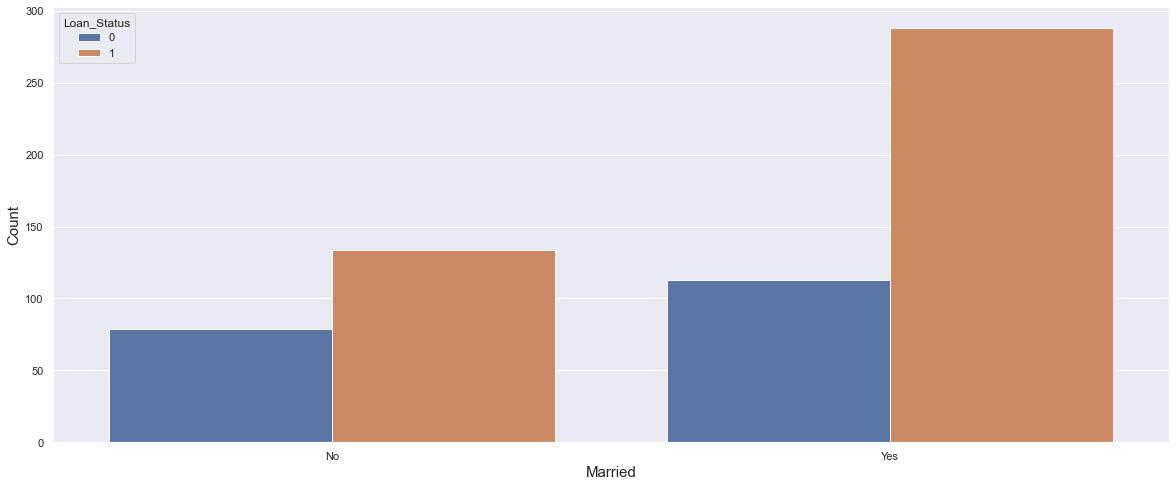

In [42]:
plt.figure(figsize=(20,8))
sns.countplot(lp['Married'], hue='Loan_Status', data= lp)
plt.xlabel('Married', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

Here we can see mostly marrieed pepole apply for loan and count for getting loan is high as compared to Non- married. 

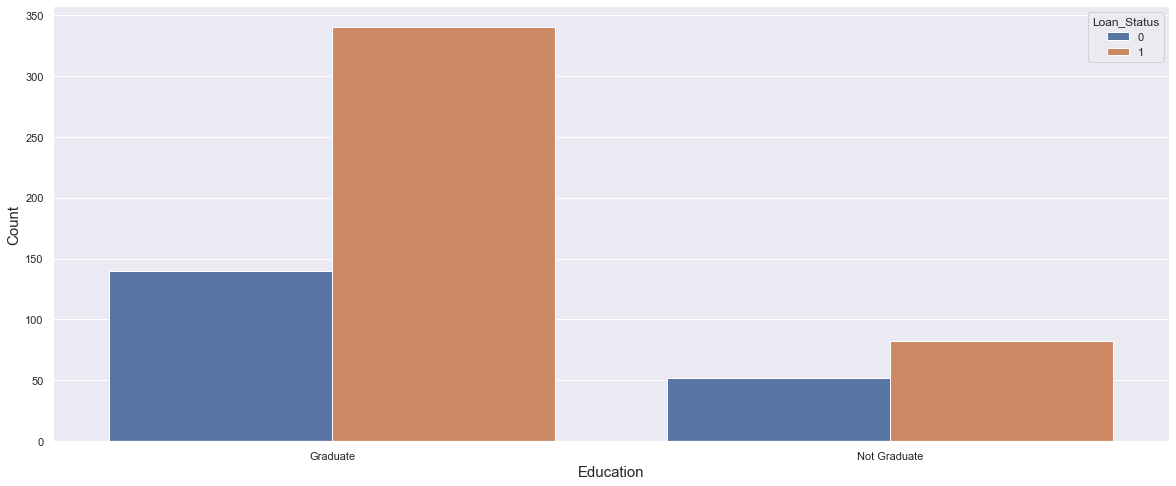

In [43]:
plt.figure(figsize=(20,8))
sns.countplot(lp['Education'], hue='Loan_Status', data= lp)
plt.xlabel('Education', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

We can see Graduate Applicants are more and getting approval also more for Graduate applicants. 

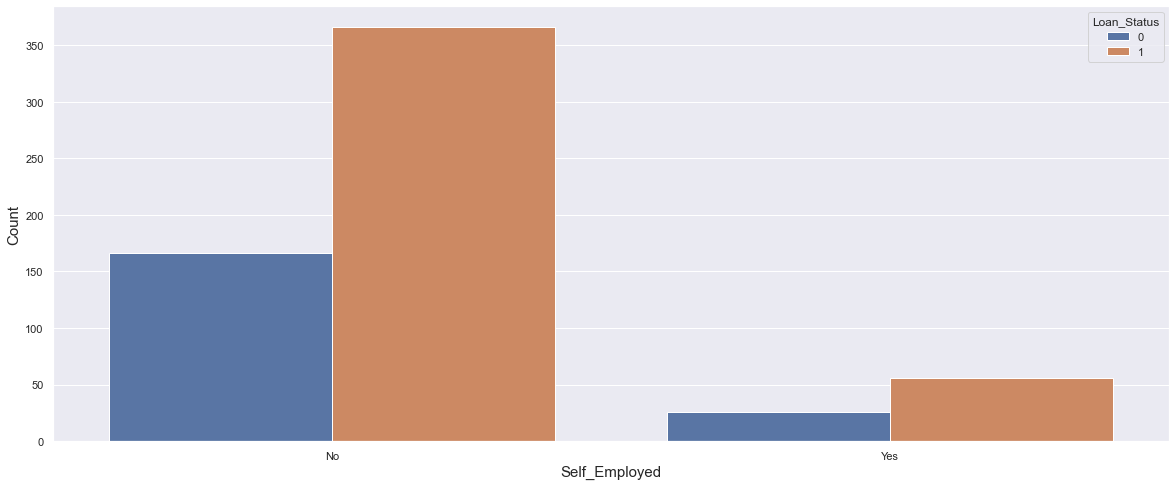

In [44]:
plt.figure(figsize=(20,8))
sns.countplot(lp['Self_Employed'], hue='Loan_Status', data= lp)
plt.xlabel('Self_Employed', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

We can see self_employed applicants are less, the change for getting approval is low for Self_employed applicants. 

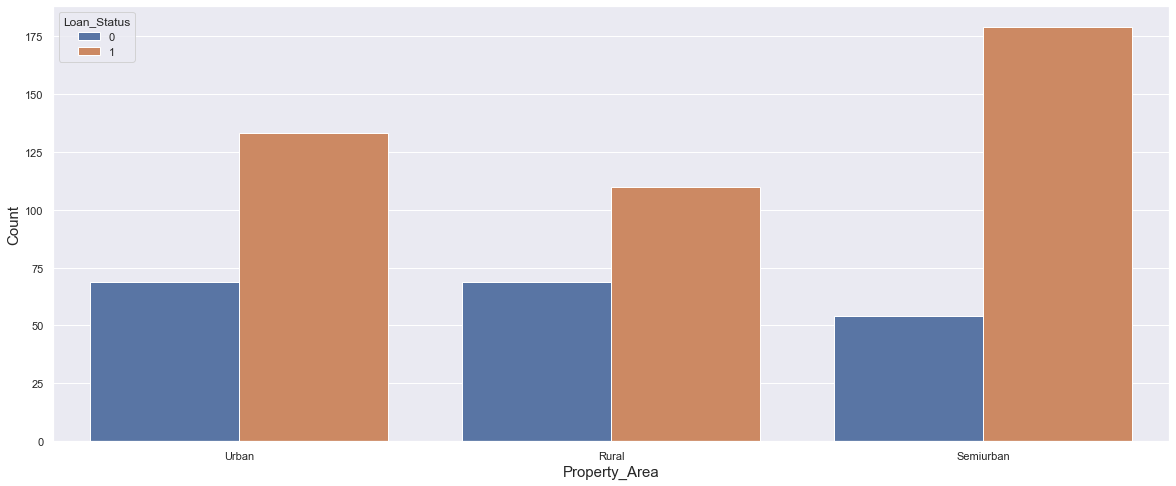

In [45]:
plt.figure(figsize=(20,8))
sns.countplot(lp['Property_Area'], hue='Loan_Status', data= lp)
plt.xlabel('Property_Area', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

Here we can see Applicants from Semiurban area are having higher chance for approval as numbers are high as compare to other Area.  

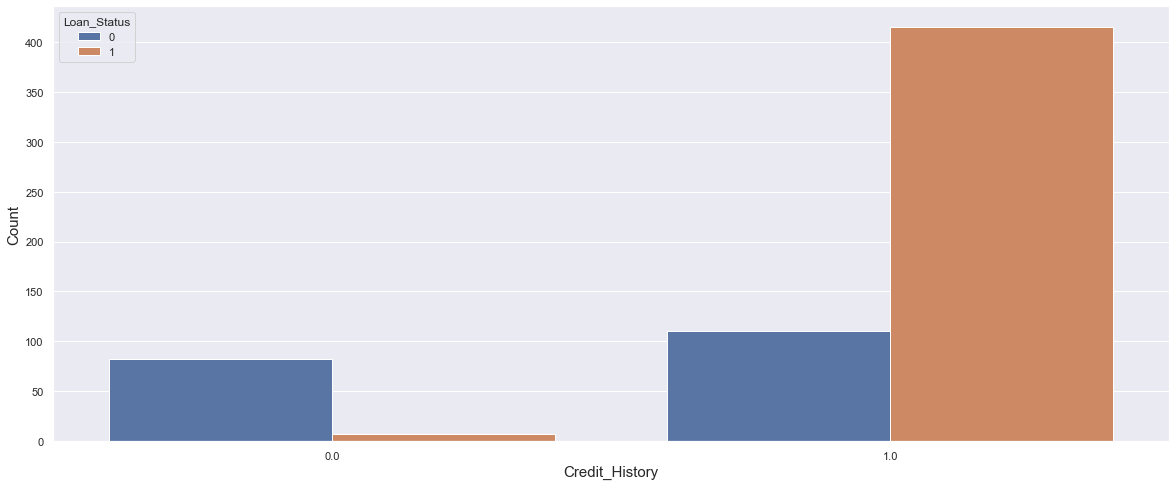

In [46]:
plt.figure(figsize=(20,8))
sns.countplot(lp['Credit_History'], hue='Loan_Status', data= lp)
plt.xlabel('Credit_History', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

Here we can see Applicant having create histry, having good chance for approval. 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

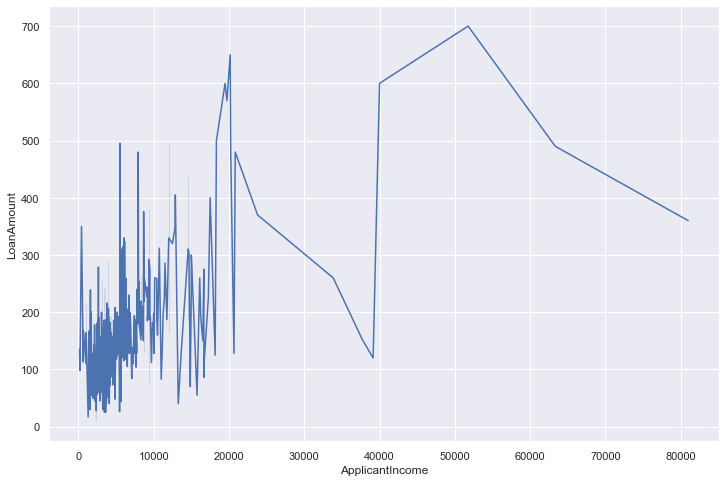

In [47]:
plt.figure(figsize=(12,8))
sns.lineplot(x='ApplicantIncome',y='LoanAmount',data=lp)

We can see with increase in the income parameter loan amount also increasing. but the number of applicants are less. 
Because with increase in the income there is no need for loan.  

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

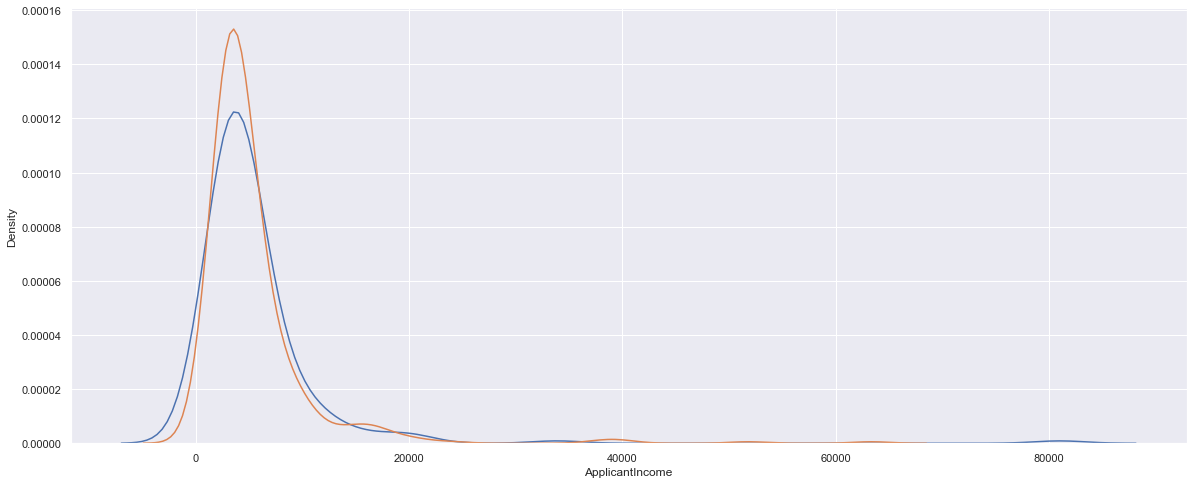

In [48]:
plt.figure(figsize=(20,8))
sns.distplot(lp[lp['Loan_Status']==0]['ApplicantIncome'], hist=False)
sns.distplot(lp[lp['Loan_Status']==1]['ApplicantIncome'], hist=False )

Here we can see initially with less income, chance of approval is low,  
But as the income increase chance of approval also increase.  

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

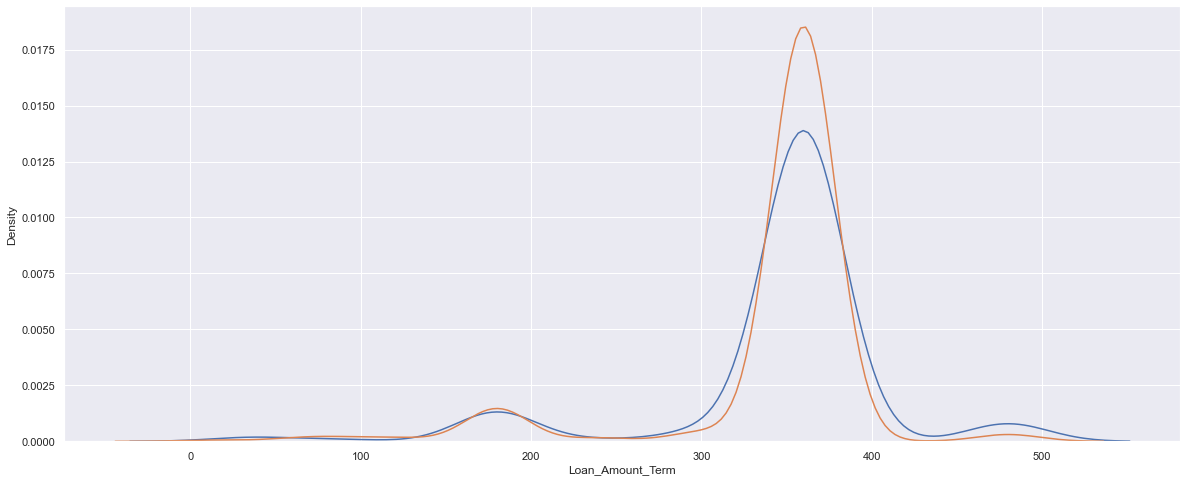

In [49]:
plt.figure(figsize=(20,8))
sns.distplot(lp[lp['Loan_Status']==0]['Loan_Amount_Term'], hist=False)
sns.distplot(lp[lp['Loan_Status']==1]['Loan_Amount_Term'], hist=False )

Here we can see between 300- 400 the chance of approval are good. 

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

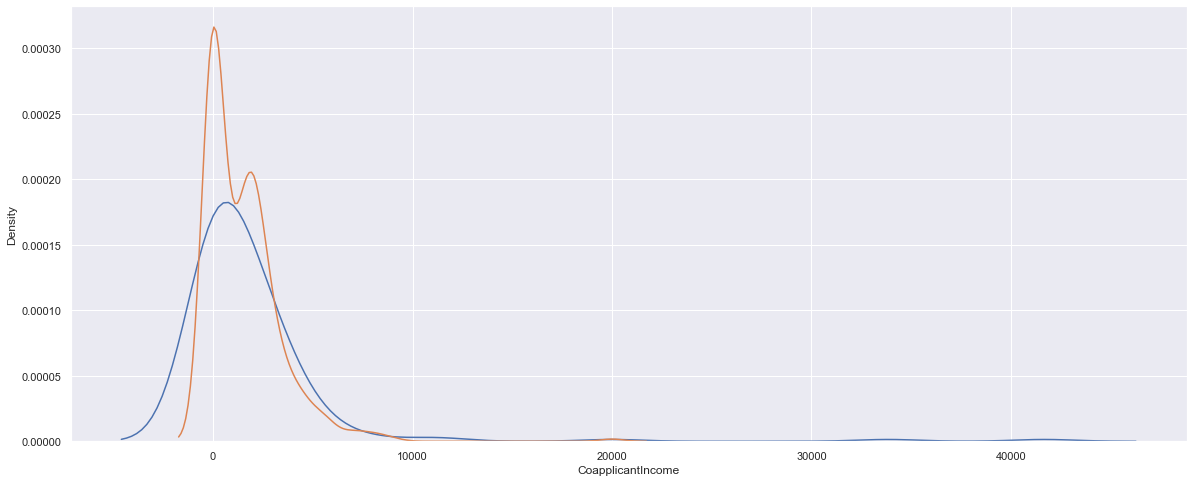

In [50]:
plt.figure(figsize=(20,8))
sns.distplot(lp[lp['Loan_Status']==0]['CoapplicantIncome'], hist=False)
sns.distplot(lp[lp['Loan_Status']==1]['CoapplicantIncome'], hist=False )

Here we can see coapplicantincome increases the chance of getting approval. 

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

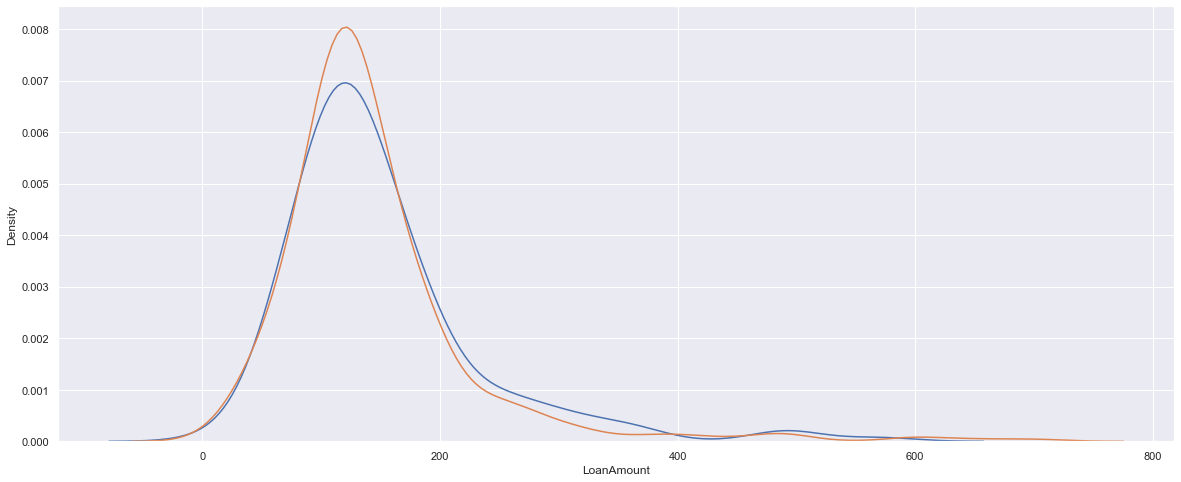

In [51]:
plt.figure(figsize=(20,8))
sns.distplot(lp[lp['Loan_Status']==0]['LoanAmount'], hist=False)
sns.distplot(lp[lp['Loan_Status']==1]['LoanAmount'], hist=False )

For loan amount lower than 200, the chance of getting approval is good, But as the loan amount increase, chance of getting approval is decreases. 

### Multivariate Anaysis

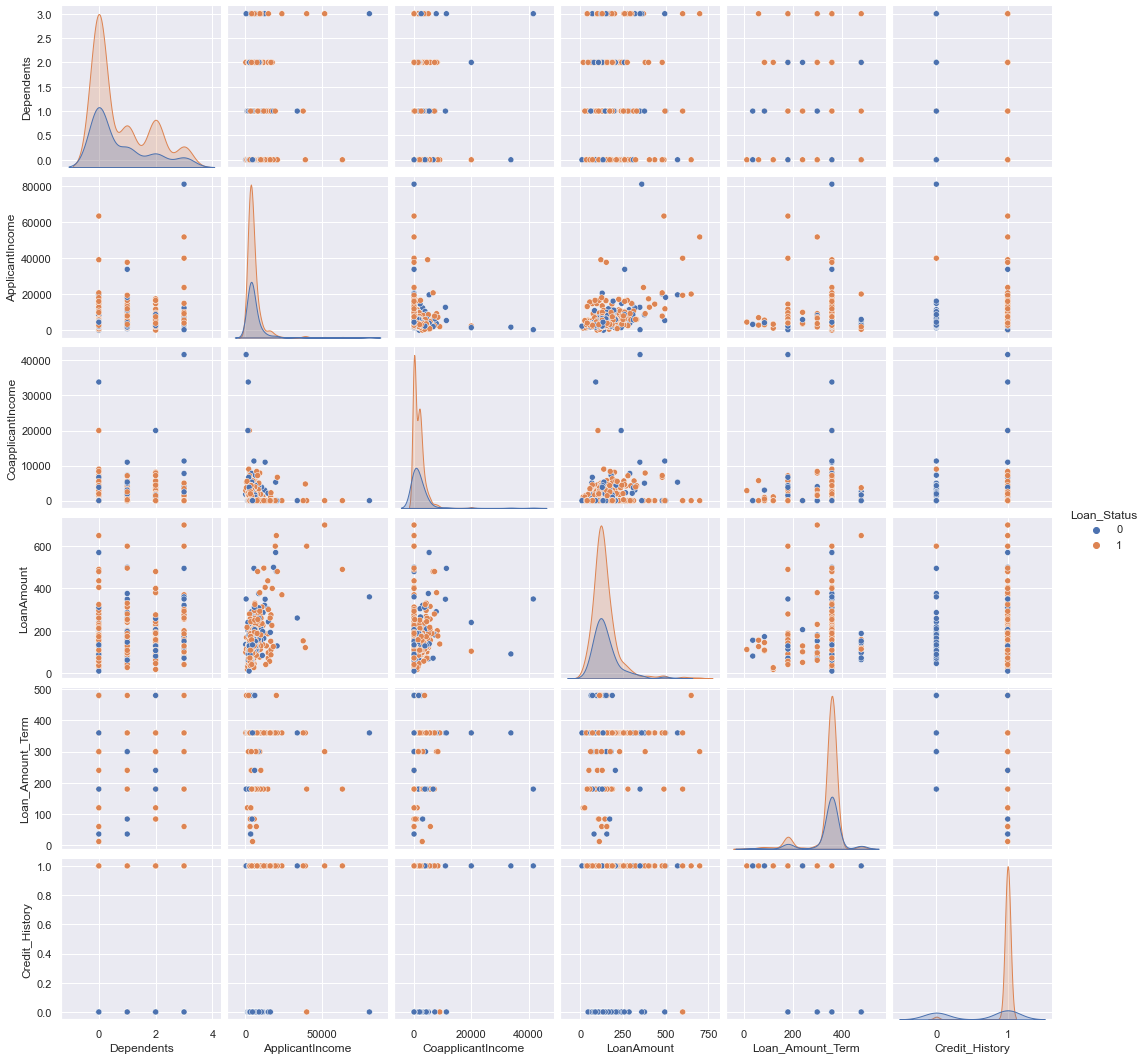

In [52]:
sns.pairplot(data=lp, hue='Loan_Status')

## EDA Summary

Gender: For male Chance of approval is high.  
Married: Married Applicants are more so the chances for approval also high.  
Dependents: Higher the Number of dependent lowers the chance of approval.
Education: Chances for approval increase with higher education.  
Self_Employed: It lowers the chance of loan approval. 
ApplicantIncome: It also increse the chance of loan approval.  
CoapplicantIncome : CoapplicantIncome incease the chance of loan approval increases. 
LoanAmount : For higher loan chances of approval are low.  
Loan_Amount_Term: For specofic term the chances are high, but is it not linear. 
Credit_History: Applicant with creadit history have high chance of approval. 
Property_Area: Semi Urban Area have hugh chance of approval. 

### Data Preprocessing

In this stage we will prepare our data for modle builing   
we will change the categorical data into numerical data using encoders   
Then  we will check the outliers and skewness for conteneus columns.  
At the scaling of data etc. 

#### Categorical columns need to endcode  
'Gender', 'Married','Education', 'Self_Employed', 'Property_Area'  
All are nominal values we can use pandas get_dummies to encode our categorical colummns.  

In [53]:
feature=lp.drop(['Loan_Status'], axis=1)

In [54]:
target= lp['Loan_Status']

In [55]:
lp_new= pd.get_dummies(feature,sparse=False, drop_first=True )

In [56]:
lp_new['Loan_Status']= target

In [57]:
lp_new.shape

(614, 13)

In [58]:
lp_new.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [59]:
lp_new.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
Dependents,1.000000,0.118202,0.030430,0.163103,-0.103864,-0.040160,0.172914,0.334216,0.055752,0.056798,0.001924,-0.001198,0.010118
ApplicantIncome,0.118202,1.000000,-0.116605,0.565181,-0.046531,-0.018615,0.058809,0.051708,-0.140760,0.127180,-0.014246,-0.000598,-0.004710
CoapplicantIncome,0.030430,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.082912,0.075948,-0.062290,-0.016100,-0.027044,0.022776,-0.059187
LoanAmount,0.163103,0.565181,0.189218,1.000000,0.036960,-0.000607,0.106904,0.146546,-0.168759,0.115100,-0.005804,-0.036050,-0.033214
Loan_Amount_Term,-0.103864,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.074030,-0.100912,-0.073928,-0.033739,0.059141,-0.094279,-0.022549
Credit_History,-0.040160,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.009170,0.010938,-0.073658,-0.001550,0.035976,-0.016934,0.540556
Gender_Male,0.172914,0.058809,0.082912,0.106904,-0.074030,0.009170,1.000000,0.364569,0.045364,-0.000525,-0.108623,0.034530,0.017987
Married_Yes,0.334216,0.051708,0.075948,0.146546,-0.100912,0.010938,0.364569,1.000000,0.012304,0.004489,0.005845,0.000546,0.091478
Education_Not Graduate,0.055752,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,0.045364,0.012304,1.000000,-0.010383,-0.039410,-0.034279,-0.085884
Self_Employed_Yes,0.056798,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.000525,0.004489,-0.010383,1.000000,0.008710,-0.030338,-0.003700


<AxesSubplot:>

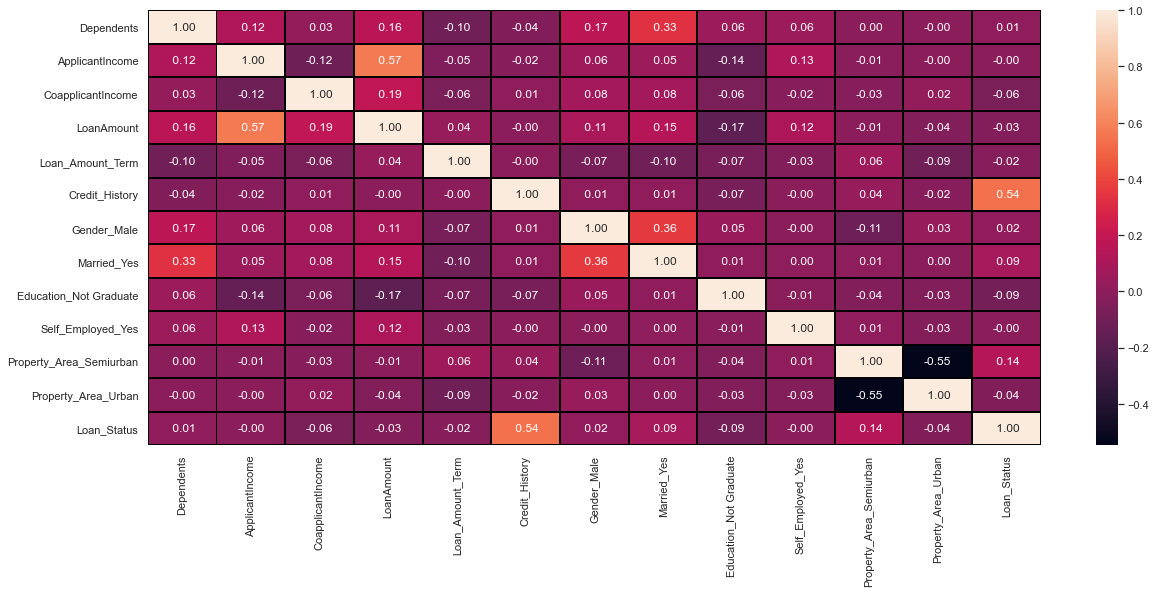

In [60]:
plt.figure(figsize=(20,8))
sns.heatmap(lp_new.corr(), annot=True, linewidths=1,linecolor='black',fmt=' .2f')

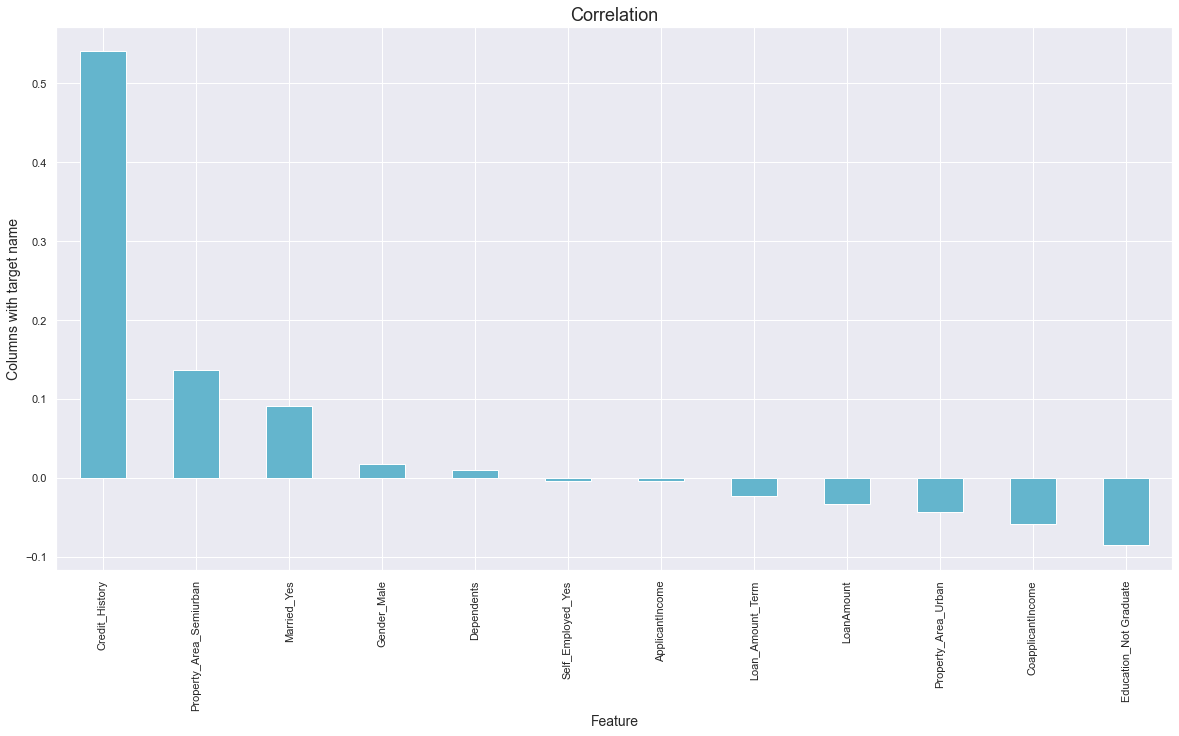

In [61]:
plt.figure(figsize=(20,10))
lp_new.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here we can see Credit histry , Property area, Married_yes, Gender anddependent having positive corelation, where as other have negative or zero corelation. 

### Checking outliers and skewness

<AxesSubplot:>

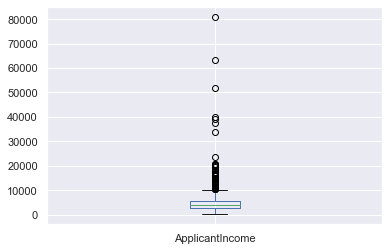

In [62]:
lp_new['ApplicantIncome'].plot.box()

<AxesSubplot:>

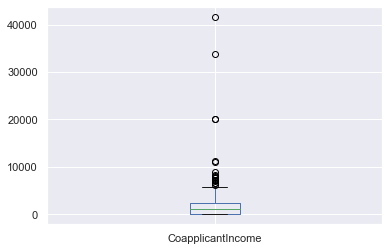

In [63]:
lp_new['CoapplicantIncome'].plot.box()

<AxesSubplot:>

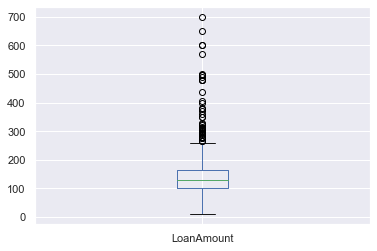

In [64]:
lp_new['LoanAmount'].plot.box()

<AxesSubplot:>

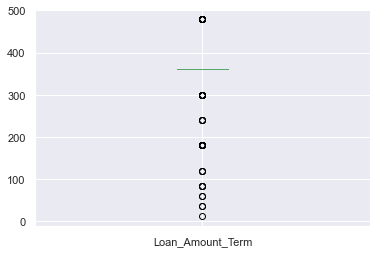

In [65]:
lp_new['Loan_Amount_Term'].plot.box()

continous columns have outliers. 

## Removing Outliers

In [66]:
from scipy.stats import zscore
z= np.abs(zscore(lp_new))
z

array([[0.73780632, 0.07299082, 0.55448733, ..., 0.7820157 , 1.42814704,
        0.67451931],
       [0.25346957, 0.13441195, 0.03873155, ..., 0.7820157 , 0.70020801,
        1.48253724],
       [0.73780632, 0.39374734, 0.55448733, ..., 0.7820157 , 1.42814704,
        0.67451931],
       ...,
       [0.25346957, 0.43717437, 0.47240418, ..., 0.7820157 , 1.42814704,
        0.67451931],
       [1.24474546, 0.35706382, 0.55448733, ..., 0.7820157 , 1.42814704,
        0.67451931],
       [0.73780632, 0.13441195, 0.55448733, ..., 1.2787467 , 0.70020801,
        1.48253724]])

##### Position of Outliers

In [67]:
threshold = 3
print(np.where(z > 3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([2, 4, 4, 4, 1, 3, 4, 1, 3, 1, 3, 2, 3, 1, 1, 4, 4, 3, 3, 4, 1, 3,
       3, 2, 1, 2, 3, 1, 3, 4, 4, 3, 3, 3, 4, 3, 4, 2, 4, 2, 3],
      dtype=int64))


In [69]:
lpm=lp_new[(z<3).all(axis=1)]
print(lp_new.shape)
print(lpm.shape)

(614, 13)
(577, 13)


In [76]:
#checking data loss%
Loss_percentage=(614-577)/614*100
print(Loss_percentage)

6.026058631921824


Percentage data loss is less we can procced with df.

In [77]:
lpm.skew()

Dependents                 1.052106
ApplicantIncome            2.148522
CoapplicantIncome          1.350517
LoanAmount                 1.151525
Loan_Amount_Term          -2.098806
Credit_History            -1.976043
Gender_Male               -1.622920
Married_Yes               -0.630211
Education_Not Graduate     1.306588
Self_Employed_Yes          2.252848
Property_Area_Semiurban    0.512963
Property_Area_Urban        0.736780
Loan_Status               -0.822635
dtype: float64

ApplicantIncome, CoapplicantIncome,LoanAmount, Loan_Amount_Term are having skewness, lets remove using log transform.

In [78]:
from sklearn.preprocessing import power_transform

Making new dataframe for skewed data.

In [79]:
lpm_skewed=lpm.iloc[:,0:6]

Applying Transformation

In [80]:
X=power_transform(lpm_skewed, method='yeo-johnson')

Making dataFrame for transformed values.

In [81]:
X=pd.DataFrame(data=X, columns=['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])

Droping skewed columns from df.

In [82]:
lpm.drop(['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'], axis=1, inplace=True)

In [83]:
lpm=lpm.reset_index()

In [84]:
lpm['Dependents']=X['Dependents']

In [85]:
lpm['ApplicantIncome']=X['ApplicantIncome']

In [86]:
lpm['CoapplicantIncome']=X['CoapplicantIncome']

In [87]:
lpm['LoanAmount']=X['LoanAmount']

In [88]:
lpm['Loan_Amount_Term']=X['Loan_Amount_Term']

In [89]:
lpm['Credit_History']=X['Credit_History']

In [90]:
lpm

,index,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,0,0,0,1,1,-0.809243,0.681780,-1.122446,0.000771,0.130788,0.418513
1,1,1,1,0,0,0,0,0,0.902869,0.234783,0.744117,0.000771,0.130788,0.418513
2,2,1,1,0,1,0,1,1,-0.809243,-0.527201,-1.122446,-1.437336,0.130788,0.418513
3,3,1,1,1,0,0,1,1,-0.809243,-0.791972,0.895786,-0.153545,0.130788,0.418513
4,4,1,0,0,0,0,1,1,-0.809243,0.728848,-1.122446,0.238260,0.130788,0.418513
5,5,1,1,0,1,0,1,1,1.344671,0.540502,1.099231,2.009019,0.130788,0.418513
6,6,1,1,1,0,0,1,1,-0.809243,-0.970781,0.745881,-0.685554,0.130788,0.418513
7,7,1,1,0,0,1,0,0,1.533596,-0.506000,0.916572,0.527553,0.130788,-2.389415
8,8,1,1,0,0,0,1,1,1.344671,-0.009176,0.748075,0.688037,0.130788,0.418513
9,10,1,1,0,0,0,1,1,1.344671,-0.412326,0.495714,-1.321947,0.130788,0.418513


### Scaling the data Using StandardScaler.

In [91]:
# Dividing into Feature and Target data
x=lpm.drop(['index', 'Loan_Status'],axis=1)
y=lpm['Loan_Status']

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
SDC=StandardScaler()
x=SDC.fit_transform(x)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

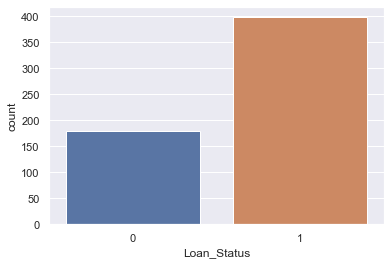

In [94]:
sns.countplot(y)

Here we can see our output is not balanced we will now use SMOTE to balance the output.

In [95]:
from imblearn.over_sampling import SMOTE

In [96]:
X_train_over, Y_train_over =SMOTE(k_neighbors=3).fit_resample(x,y)

In [97]:
X_train_over.shape

(796, 12)

In [98]:
Y_train_over.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

In [99]:
dfx=pd.DataFrame(data=X_train_over, columns=['Gender_Male','Married_Yes','Education_Not Graduate','Self_Employed_Yes','Property_Area_Semiurban','Property_Area_Urban','Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])

Here we can see over data is balance now.

### VIF calculation

In [100]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [102]:
calc_vif(dfx)

,variables,VIF FACTOR
0,Gender_Male,1.290290
1,Married_Yes,1.555402
2,Education_Not Graduate,1.069374
3,Self_Employed_Yes,1.050996
4,Property_Area_Semiurban,1.439194
5,Property_Area_Urban,1.443878
6,Dependents,1.226983
7,ApplicantIncome,1.873583
8,CoapplicantIncome,1.648524
9,LoanAmount,1.726974


Vif is less than 10 we can proceed for model development 

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [104]:
x=dfx
y=Y_train_over

In [105]:
x.shape

(796, 12)

In [106]:
y.shape

(796,)

### Chosing Best Random State

In [107]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model is performing Well")
        print("At Random State", i)
        print("Training Accuracy score-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score-", accuracy_score(y_test,pred_test)*100)

At Random state  91 The Model is performing Well
At Random State 91
Training Accuracy score- 73.11320754716981
Testing Accuracy Score- 73.125
At Random state  174 The Model is performing Well
At Random State 174
Training Accuracy score- 73.11320754716981
Testing Accuracy Score- 73.125
At Random state  297 The Model is performing Well
At Random State 297
Training Accuracy score- 72.48427672955975
Testing Accuracy Score- 72.5
At Random state  308 The Model is performing Well
At Random State 308
Training Accuracy score- 73.11320754716981
Testing Accuracy Score- 73.125
At Random state  509 The Model is performing Well
At Random State 509
Training Accuracy score- 71.85534591194968
Testing Accuracy Score- 71.875
At Random state  534 The Model is performing Well
At Random State 534
Training Accuracy score- 71.85534591194968
Testing Accuracy Score- 71.875
At Random state  583 The Model is performing Well
At Random State 583
Training Accuracy score- 73.11320754716981
Testing Accuracy Score- 73.

At Random State 801  
Training Accuracy score is- 75.0  
Testing Accuracy Score is- 75.0  

In [108]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=801,test_size=0.20)

In [109]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))

0.68125


In [110]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[47 40]
 [11 62]]
              precision    recall  f1-score   support

           0       0.81      0.54      0.65        87
           1       0.61      0.85      0.71        73

    accuracy                           0.68       160
   macro avg       0.71      0.69      0.68       160
weighted avg       0.72      0.68      0.68       160



## Cross validation of model

In [111]:
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j, scoring='accuracy')
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 72.73869346733667
Accuracy Score:- 68.125


at cv:- 3
Cross Validation scre is:- 71.98373291719865
Accuracy Score:- 68.125


at cv:- 4
Cross Validation scre is:- 71.98492462311557
Accuracy Score:- 68.125


at cv:- 5
Cross Validation scre is:- 71.48506289308176
Accuracy Score:- 68.125


at cv:- 6
Cross Validation scre is:- 73.49339257233994
Accuracy Score:- 68.125


at cv:- 7
Cross Validation scre is:- 72.11058620001329
Accuracy Score:- 68.125


at cv:- 8
Cross Validation scre is:- 71.73106060606061
Accuracy Score:- 68.125


at cv:- 9
Cross Validation scre is:- 71.73277721030531
Accuracy Score:- 68.125




at cv:- 7   
Cross Validation scre is:- 72.36786656907756  
Accuracy Score:- 75.0  

At cv-7 Cross val score and Accuracy Score are having diffrence, Model is not perfoming well.  
But still need improvement  
Lets try another model   

## SVC

In [112]:
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy score:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=7, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross value Score is :', svc_score*100)

Accuracy score: 68.75
Cross value Score is : 73.86719009914165


In [113]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[51 36]
 [14 59]]
              precision    recall  f1-score   support

           0       0.78      0.59      0.67        87
           1       0.62      0.81      0.70        73

    accuracy                           0.69       160
   macro avg       0.70      0.70      0.69       160
weighted avg       0.71      0.69      0.69       160



Accuracy_core: 75.625
Cross val Score : 75.26005278683435  
Diffrence is lesser as compare to Logistic regression, lets try anaother model. 

## Ensemble Techniques

#### KNeighborsClassifier

In [114]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=7, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 68.75
Cross val Score : 75.75021624858607


In [115]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[60 27]
 [23 50]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71        87
           1       0.65      0.68      0.67        73

    accuracy                           0.69       160
   macro avg       0.69      0.69      0.69       160
weighted avg       0.69      0.69      0.69       160



accuracy_score: 75.625  
Cross val Score : 75.5117883203584  
  
Both accuracy score and Cross val score  having lesser diffrence, as compare to SVC and logistic, KNeighborsClassifier is performing well.   

### DecisionTreeClassifier

In [116]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=7, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross value score is:",dtcv_score*100 )

accuracy score 70.0
Cross value score is: 79.15585423736331


In [117]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[64 23]
 [25 48]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        87
           1       0.68      0.66      0.67        73

    accuracy                           0.70       160
   macro avg       0.70      0.70      0.70       160
weighted avg       0.70      0.70      0.70       160



accuracy_score 73.125   
Cross val score is: 79.65378046887129  
Both accuracy score and Cross val score having big diffrence, Model performance is bad. 

### RandomForestClassifier

In [118]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=7, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  76.875
Cross val Score : 83.93550247299666


In [119]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[64 23]
 [14 59]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        87
           1       0.72      0.81      0.76        73

    accuracy                           0.77       160
   macro avg       0.77      0.77      0.77       160
weighted avg       0.77      0.77      0.77       160



accuracy_score:  85.625   
Cross val Score : 85.06443098897688  
Both the score are having very less diffrence as compare to other models, RandomForestClassifier performing good.  

### AdaBoostClassifier

In [120]:
ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=7, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  68.75
Cross val Score : 75.38536607004237


In [121]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[49 38]
 [12 61]]
              precision    recall  f1-score   support

           0       0.80      0.56      0.66        87
           1       0.62      0.84      0.71        73

    accuracy                           0.69       160
   macro avg       0.71      0.70      0.69       160
weighted avg       0.72      0.69      0.68       160



accuracy_score:  71.875  
Cross val Score : 75.76574178809857    
Model performance is bad.  RandomForestClassifier is still better.

### GaussianNB

In [122]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=7, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 66.875
Cross Val Score is : 71.73575531749728


In [123]:
print(confusion_matrix(y_test_b, gb_pred))
print(classification_report(y_test_b, gb_pred))

[[37 50]
 [ 3 70]]
              precision    recall  f1-score   support

           0       0.93      0.43      0.58        87
           1       0.58      0.96      0.73        73

    accuracy                           0.67       160
   macro avg       0.75      0.69      0.65       160
weighted avg       0.77      0.67      0.65       160



Accuracy Score is: 72.5  
Cross Val Score is : 72.24144431876151     
Model performance is good,but RandomForestClassifier is still better

### Hyperparameter Tuning of the model

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [100, 300,400, 500, 800, 1200], 'criterion':['gini', 'entropy'], 'max_features':['auto','sqrt', 'log2'], 'min_samples_split':[2, 5, 10, 15, 100],'max_depth':[5, 8, 15, 25, 30] }
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'entropy', 'max_depth': 25, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}


In [125]:
rf=RandomForestClassifier(criterion='gini',max_depth=25, max_features='auto', min_samples_split=2, n_estimators=500 )
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=7,scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  77.5
Cross val Score : 84.68738217224477


In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters= {'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_features':['auto','sqrt','log2'], 'min_samples_leaf':list(range(0,5))}
dt=DecisionTreeClassifier()
dtclf=GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dtclf.fit (x_train_b, y_train_b)
print(dtclf.best_params_)  

{'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'splitter': 'best'}


In [127]:
dt=DecisionTreeClassifier(criterion='entropy', max_features='auto', splitter= 'best', min_samples_leaf=1)
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=7, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 72.5
Cross val score is: 74.11227183001753


In [128]:
from sklearn.neighbors import KNeighborsClassifier
parameters={'n_neighbors':[1,3,4,5,7,9],'weights':['uniform', 'distance'], 'algorithm':['auto','ball_tree','kd_tree', 'brute'], 'leaf_size':[10,20,30,40,50]}
kn=KNeighborsClassifier()
knclf=GridSearchCV(kn,parameters)
knclf.fit(x_train_b, y_train_b)
print(knclf.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 1, 'weights': 'uniform'}


In [129]:
kn=KNeighborsClassifier(algorithm='auto',leaf_size=10,  n_neighbors=1, weights='uniform')
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=7, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 78.125
Cross val Score : 82.17002683700402


In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters= {'C':[0.1,1.0,1.5,2,2.5],'kernel':[ 'linear','poly', 'rbf', 'sigmoid'], 'random_state': list(range(0,5)), 'gamma':['scale', 'auto'],'decision_function_shape':['ovo', 'ovr']}
svc=SVC()
clf=GridSearchCV(svc, param_grid=parameters, n_jobs=-1)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'C': 1.5, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'poly', 'random_state': 0}


In [131]:
scv=SVC(C=2.5,decision_function_shape='ovo', gamma='auto', kernel='rbf', random_state=0)
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=6, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 68.75
Cross val Score : 73.49149388623073


### RandomForestClassifier with accuracy_score:  84.375 Cross val Score : 85.44147980570897 is our best model.

### AUC ROC Curve:

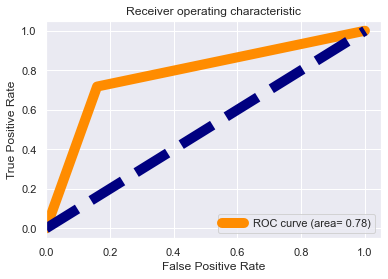

In [132]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(rf_pred, y_test_b)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [133]:
import pickle
filename="Evaluation_Project_Loan_Application_Status_Prediction.pkl "
pickle.dump(dt, open(filename,'wb'))

In [134]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
5,0,0
6,0,0
7,1,0
8,0,1
9,0,0
